In [1]:
from pathlib import Path
import json
import numpy as np
import pandas as pd

## Define functions to read metrics from model zoos

In [2]:
def read_json_line(file_path, line_number):
    """
    Read a specific line from a JSON file and return its content.

    Args:
        file_path (str): Path to the JSON file.
        line_number (int): The line number to read (0-based index).

    Returns:
        dict: The parsed JSON object from the specified line.
    """
    with open(file_path, 'r') as f:
        for current_line_number, line in enumerate(f):
            if current_line_number == line_number:
                return json.loads(line)
    raise IndexError(f"Line {line_number} not found in file {file_path}.")

def compile_configs(root_dir, line_number):
    """
    Compile configurations from specific lines of result.json files in the directory structure.

    Args:
        root_dir (str): The root directory containing the configuration directories.
        line_number (int): The line number to read from each result.json file.

    Returns:
        pd.DataFrame: DataFrame of configurations.
    """
    # Create a Path object for the root directory
    root_path = Path(root_dir)

    # List to hold all the configurations and their paths
    data = []

    # Walk through the directory structure
    path_list = [pdx for pdx in root_path.iterdir() if pdx.is_dir()]
    for pdx in path_list:
        json_file = pdx.joinpath('result.json')    
        # Load the specific line from the JSON file
        try:
            result = read_json_line(json_file, line_number)
        except FileNotFoundError:
            print(f"File not found: {json_file}")
            continue
        except IndexError as e:
            print(e)
            continue
        
        # Unroll the 'config' dictionary into the main dictionary
        config = result.pop('config', {})
        result.update(config)
        
        # Append the configuration and the path to the data list
        result["file_path"] = str(json_file).replace("result.json", "")
        data.append(result)

    # Convert the list of dictionaries to a pandas DataFrame
    df = pd.DataFrame(data)

    return df

## Read data from model zoo

Please download the sample model zoos before executing the cells below. To download and extract the data, run `download_Data.sh` in the main directory. This will download and extract two sample model zoos.

In [13]:
# set path to model zoo

# option 1: cifar10 - ResNet 18
path_zoo = Path('./data/cifar_10-ResNet18-subset')
epoch = 115 
# epoch=150

# option 2: cifar100 - ResNet 50
# path_zoo = Path('./data/cifar_100-ResNet50-subset')
# epoch = 125
# epoch = 150


In [14]:
# load data from zoo to a pd.DataFrame
data_df = compile_configs(root_dir=path_zoo, line_number=epoch)

# explore dataframe
data_df

,train_loss,train_acc,test_loss,test_acc,done,training_iteration,trial_id,date,timestamp,time_this_iter_s,...,training::epochs_train,training::output_epoch,training::data_path,cuda,dataset::dump,wandb,resources,scheduler::steps_per_epoch,file_path,training::accumulate_gradients_steps
0,2.040568,0.45152,2.070884,0.456367,False,125,bf0b6_00173,2024-05-23_12-12-35,1716466355,83.131920,...,150,1,/ds2/model_zoos/taxonomy/cifar_100/,True,/ds2/model_zoos/taxonomy/cifar_100/dataset_pre...,{'project': 'Cifar-100 Resnet50_width kaiming-...,"{'cpu': 12, 'gpu': 1}",6250,/ds2/model_zoos/taxonomy/cifar_100/zoos/Cifar-...,NaN
1,1.255369,0.63544,1.536325,0.560933,False,125,bf0b6_00130,2024-05-22_23-43-40,1716421420,20.625564,...,150,1,/ds2/model_zoos/taxonomy/cifar_100/,True,/ds2/model_zoos/taxonomy/cifar_100/dataset_pre...,{'project': 'Cifar-100 Resnet50_width kaiming-...,"{'cpu': 12, 'gpu': 1}",1563,/ds2/model_zoos/taxonomy/cifar_100/zoos/Cifar-...,NaN
2,0.014904,0.99974,2.593069,0.435900,False,125,bf0b6_00026,2024-05-22_12-22-07,1716380527,3.571155,...,150,1,/ds2/model_zoos/taxonomy/cifar_100/,True,/ds2/model_zoos/taxonomy/cifar_100/dataset_pre...,{'project': 'Cifar-100 Resnet50_width kaiming-...,"{'cpu': 12, 'gpu': 1}",98,/ds2/model_zoos/taxonomy/cifar_100/zoos/Cifar-...,NaN
3,0.825139,0.76460,3.137397,0.339167,False,125,bf0b6_00009,2024-05-22_11-46-35,1716378395,3.291754,...,150,1,/ds2/model_zoos/taxonomy/cifar_100/,True,/ds2/model_zoos/taxonomy/cifar_100/dataset_pre...,{'project': 'Cifar-100 Resnet50_width kaiming-...,"{'cpu': 12, 'gpu': 1}",49,/ds2/model_zoos/taxonomy/cifar_100/zoos/Cifar-...,NaN
4,0.004196,0.99972,1.509370,0.629867,False,125,bf0b6_00031,2024-05-22_15-03-39,1716390219,54.370883,...,150,1,/ds2/model_zoos/taxonomy/cifar_100/,True,/ds2/model_zoos/taxonomy/cifar_100/dataset_pre...,{'project': 'Cifar-100 Resnet50_width kaiming-...,"{'cpu': 12, 'gpu': 1}",98,/ds2/model_zoos/taxonomy/cifar_100/zoos/Cifar-...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.517406,0.84234,1.628824,0.595867,False,125,bf0b6_00141,2024-05-23_01-34-33,1716428073,22.041952,...,150,1,/ds2/model_zoos/taxonomy/cifar_100/,True,/ds2/model_zoos/taxonomy/cifar_100/dataset_pre...,NaN,"{'cpu': 12, 'gpu': 1}",1563,/ds2/model_zoos/taxonomy/cifar_100/zoos/Cifar-...,NaN
188,0.014904,0.99976,2.757801,0.435900,False,125,bf0b6_00042,2024-05-22_13-18-39,1716383919,3.550406,...,150,1,/ds2/model_zoos/taxonomy/cifar_100/,True,/ds2/model_zoos/taxonomy/cifar_100/dataset_pre...,NaN,"{'cpu': 12, 'gpu': 1}",98,/ds2/model_zoos/taxonomy/cifar_100/zoos/Cifar-...,NaN
189,1.227545,0.64498,1.552234,0.575933,False,125,bf0b6_00149,2024-05-23_04-01-35,1716436895,40.346259,...,150,1,/ds2/model_zoos/taxonomy/cifar_100/,True,/ds2/model_zoos/taxonomy/cifar_100/dataset_pre...,NaN,"{'cpu': 12, 'gpu': 1}",3125,/ds2/model_zoos/taxonomy/cifar_100/zoos/Cifar-...,NaN
190,0.025372,0.99442,1.454211,0.642967,False,125,bf0b6_00118,2024-05-22_22-04-39,1716415479,26.675034,...,150,1,/ds2/model_zoos/taxonomy/cifar_100/,True,/ds2/model_zoos/taxonomy/cifar_100/dataset_pre...,NaN,"{'cpu': 12, 'gpu': 1}",782,/ds2/model_zoos/taxonomy/cifar_100/zoos/Cifar-...,NaN


In [15]:
# The dataframe contains multiple performance and loss landscape metrics for every model in teh zoo
data_df.keys()

Index(['train_loss', 'train_acc', 'test_loss', 'test_acc', 'done',
       'training_iteration', 'trial_id', 'date', 'timestamp',
       'time_this_iter_s', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'iterations_since_restore', 'ggap',
       'representation_similarity', 'curve_mc_train_error',
       'curve_mc_test_error', 'log_hessian_trace_train',
       'log_hessian_top_ev_val', 'wiseft_acc_test_delta',
       'gitrebasin_acc_test_delta', 'model::type', 'model::channels_in',
       'model::o_dim', 'model::nlin', 'model::dropout', 'model::init_type',
       'model::use_bias', 'model::width', 'optim::optimizer', 'optim::lr',
       'optim::wd', 'optim::momentum', 'optim::scheduler', 'training::loss',
       'training::dataloader', 'trainloader::workers', 'testloader::workers',
       'seed', 'training::batchsize', 'training::epochs_train',
       'training::output_epoch', 'training::data_path', 'cuda',
       'dataset::dump', 'wandb', 'resources', 'sche

## Visualize phases

The cell below re-creates the figures in the submission from the model zoo samples.

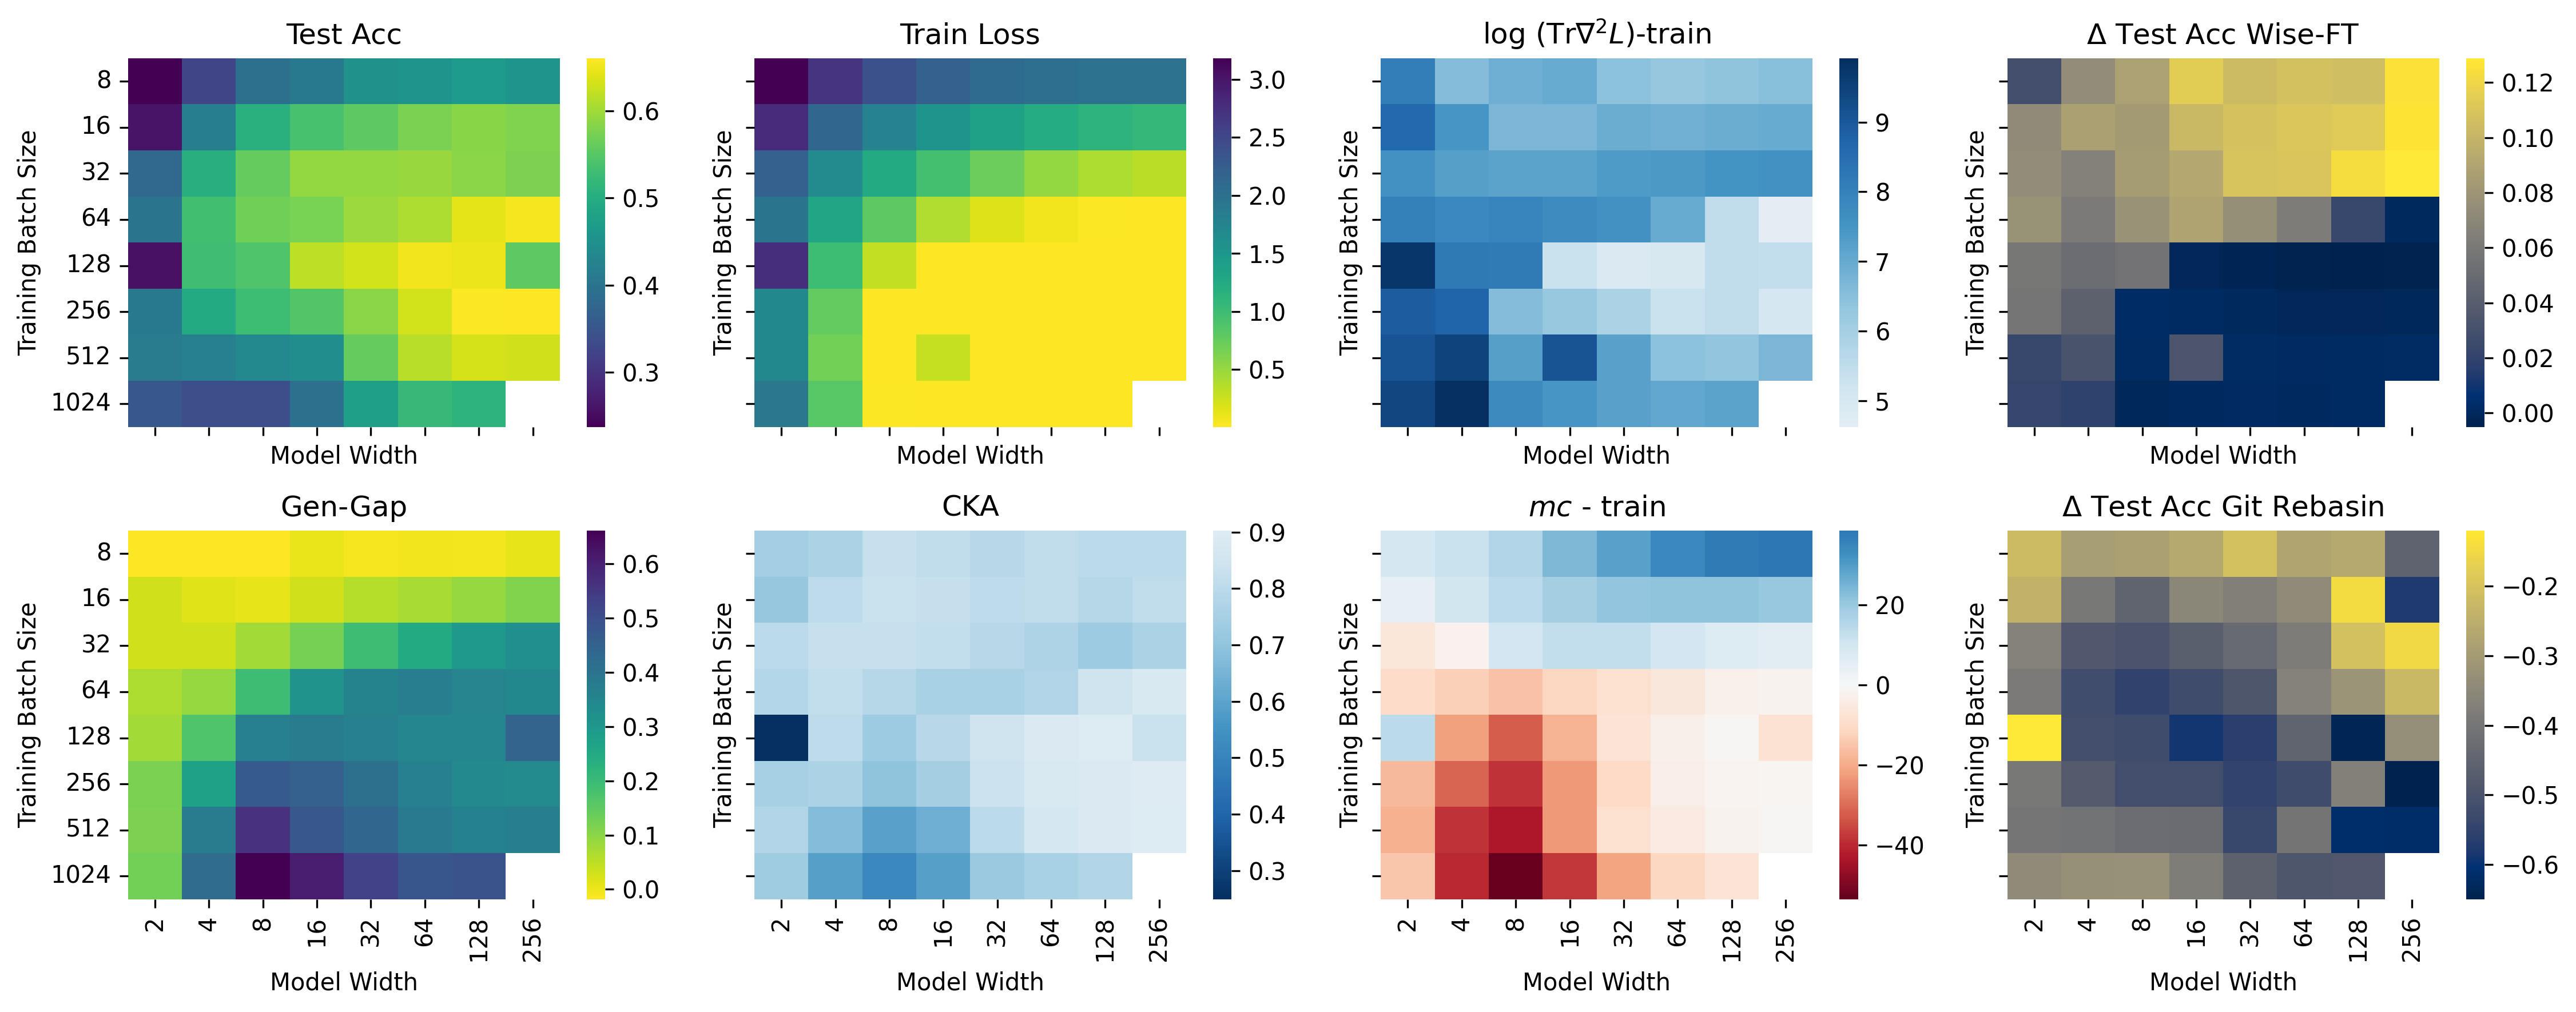

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


fig_list = [["train_loss","test_acc"],["ggap","representation_similarity"],['curve_mc_train_error','curve_mc_test_error'],
            [ "log_hessian_trace_train","log_hessian_top_ev_val"],['wiseft_acc_test_delta','gitrebasin_acc_test_delta']]
fig_list = [["test_acc","ggap"],["train_loss","representation_similarity"],["log_hessian_trace_train",'curve_mc_train_error'],
            ['wiseft_acc_test_delta','gitrebasin_acc_test_delta']]

# centered = ['curve_mc_train_error', 'curve_mc_test_error']
centered = {
    'curve_mc_train_error':[0, False], 
    'curve_mc_test_error':[0, False],
    'representation_similarity':[1.0,True],
    'log_hessian_trace_train':[4, False],
    'log_hessian_trace_val':[5, False],
    'log_hessian_top_ev_train':[1, False],
    'log_hessian_top_ev_val':[1, False],
   }
perf_metrics = {
    'test_acc':False, 
    'ggap':True, 
    'train_loss':True, 
}
averaging_metrics = {
    'wiseft_acc_test_delta':False, 
    'gitrebasin_acc_test_delta':False, 
}
num_cols = len(fig_list)
num_rows = len(fig_list[0])

title_dict = {
    "train_loss": "Train Loss",
    "test_acc": "Test Acc",
    "ggap": "Gen-Gap",
    "curve_mc_train_error": r"$mc$ - train",
    "curve_mc_test_error": r"$mc$ - val",
    "log_hessian_top_ev": r"log$(\lambda_{max})$",
    "log_hessian_trace": r"log $($Tr$\nabla^2 L)$",
    "log_hessian_top_ev_train": r"log$(\lambda_{max})$-train",
    "log_hessian_trace_train": r"log $($Tr$\nabla^2 L)$-train",
    "log_hessian_top_ev_val": r"log$(\lambda_{max})$-val",
    "log_hessian_trace_val": r"log $($Tr$\nabla^2 L)$-val",
    "representation_similarity": r"CKA",
    "wiseft_acc_test_delta": r"$\Delta$ Test Acc Wise-FT",
    "gitrebasin_acc_test_delta": r"$\Delta$ Test Acc Git Rebasin",
}

fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows,figsize=(3.8*num_cols,3*num_rows),dpi=300,sharex=True,sharey=True)

df_merged = data_df

for idx,fig_keys in enumerate(fig_list):
    for jdx,fig_key in enumerate(fig_keys):
        df_fig = df_merged.pivot_table(index='training::batchsize', columns='model::width', values=fig_key)
    
        # Create the heatmap
        adx = ax[jdx,idx]
    
        if fig_key in centered:
            center, inverted = centered[fig_key]
            # cmap = plt.cm.get_cmap('RdBu')
            cmap = plt.colormaps.get_cmap('RdBu')
            if inverted:
                # Invert the colormap
                cmap = cmap.reversed()
            sns.heatmap(df_fig, annot=False, cmap=cmap, center=center, cbar=True,ax=adx)
        elif fig_key in perf_metrics:
            inverted = perf_metrics[fig_key]
            cmap = plt.colormaps.get_cmap('viridis')
            if inverted:
                # Invert the colormap
                cmap = cmap.reversed()
            sns.heatmap(df_fig, annot=False, cmap=cmap, cbar=True,ax=adx)
        elif fig_key in averaging_metrics:
            inverted = averaging_metrics[fig_key]
            # cmap = sns.light_palette(color='green')
            # cmap = plt.colormaps.get_cmap('magma')
            cmap = plt.colormaps.get_cmap('cividis')
            if inverted:
                # Invert the colormap
                cmap = cmap.reversed()
            sns.heatmap(df_fig, annot=False, cmap=cmap, cbar=True,ax=adx)
        else:
            cmap = plt.colormaps.get_cmap('viridis')
            sns.heatmap(df_fig, annot=False, cmap=cmap, cbar=True,ax=adx)
        adx.set_title(f'{title_dict[fig_key]}')
        adx.set_xlabel('Model Width')
        adx.set_ylabel('Training Batch Size')

fig.tight_layout()
plt.show()


# Instantiate models and load checkpoints

Next, we'll inspect a single model, load it's config and checkpoint, and re-instantiate it.

In [ ]:
# set zoo path
path_zoo = Path('./data/cifar_100-ResNet50-subset')

# pick one model out of the zoo
model_path = path_zoo.joinpath('NN_tune_trainable_bf0b6_00005_5_model_width=64,optim_lr=0.1000,optim_wd=0.0005,seed=0,training_batchsize=1024_2024-05-22_11-30-52')

# there is a config json file named `params.json`
config_path = model_path.joinpath('params.json')

# set path for checkpoint at epoch 100
checkpoint_path = model_path.joinpath('checkpoint_000100','checkpoints')


In [19]:
# we need torch and some local code to instantiate the model

import torch
import sys
sys.path.append('./src/')

from ptmz.models.def_net_width import NNmodule_width

In [ ]:
# load model config
config = json.load(config_path.open('r'))

config

In [ ]:
# instantiate the trainer wrapper
config["device"] = torch.device('cpu')
config["cuda"] = False
config["scheduler::steps_per_epoch"] = 123
trainer = NNmodule_width(config)

In [ ]:
# load checkpoint 
ckpt = torch.load(checkpoint_path,map_location='cpu')

In [ ]:
# load checkpoint
trainer.model.load_state_dict(ckpt)